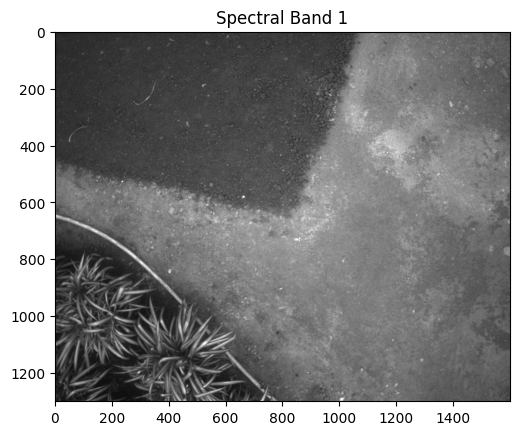

[array([[12928, 12608, 11840, ..., 19904, 24128, 25536],
        [14272, 13184, 10304, ..., 24064, 22848, 22464],
        [12032, 14720, 13888, ..., 21632, 20416, 24128],
        ...,
        [12544, 12736, 14784, ..., 18624, 19008, 19904],
        [10496, 11520, 12544, ..., 19392, 19392, 19456],
        [10880, 10880, 11776, ..., 19904, 18432, 18560]], dtype=uint16)]

In [ ]:
from osgeo import gdal
import matplotlib.pyplot as plt

def get_spectral_bands(file_paths):
    try:
      for tif_file in file_paths:
        dataset = gdal.Open(tif_file)
        if dataset is None:
            print("Failed to open the TIFF file.")
            return

        num_bands = dataset.RasterCount
        spectral_bands = []

        for band_index in range(1, num_bands + 1):
            band = dataset.GetRasterBand(band_index)
            band_data = band.ReadAsArray()
            spectral_bands.append(band_data)

            # Plot each spectral band
            plt.imshow(band_data, cmap='gray')
            plt.title(f"Spectral Band {band_index}")
            plt.show()

        dataset = None  # Close the dataset

        return spectral_bands

    except Exception as e:
        print(f"Error: {str(e)}")

# Provide the path to your .tif file
#if_file = ["/content/DJI_0321.TIF","/content/DJI_0322.TIF","/content/DJI_0323.TIF","/content/DJI_0324.TIF","/content/DJI_0325.TIF"]
tif_file2 = ["/content/DJI_0341.TIF","/content/DJI_0342.TIF","/content/DJI_0343.TIF","/content/DJI_0344.TIF","/content/DJI_0345.TIF"]

#spectral_bands =
#get_spectral_bands(tif_file)
get_spectral_bands(tif_file2)


In [ ]:
import rasterio

# Step 1: Open the multispectral image
image_path = tif_file2
for image_path in image_path:
  with rasterio.open(image_path) as dataset:
    # Step 2: Get image shape
    image_shape = dataset.shape
    print("Image Shape:", image_shape)

    # Step 3: Get number of bands
    num_bands = dataset.count
    print("Number of Bands:", num_bands)

    # Step 4: Get spatial resolution
    spatial_resolution = dataset.res
    print("Spatial Resolution:", spatial_resolution)

    # Step 5: Get georeferencing information
    geotransform = dataset.transform
    print("Geotransform:", geotransform)

    # Step 6: Get coordinate reference system (CRS)
    crs = dataset.crs
    print("Coordinate Reference System (CRS):", crs)


Image Shape: (1300, 1600)
Number of Bands: 1
Spatial Resolution: (1.0, 1.0)
Geotransform: | 1.00, 0.00, 0.00|
| 0.00, 1.00, 0.00|
| 0.00, 0.00, 1.00|
Coordinate Reference System (CRS): None
Image Shape: (1300, 1600)
Number of Bands: 1
Spatial Resolution: (1.0, 1.0)
Geotransform: | 1.00, 0.00, 0.00|
| 0.00, 1.00, 0.00|
| 0.00, 0.00, 1.00|
Coordinate Reference System (CRS): None
Image Shape: (1300, 1600)
Number of Bands: 1
Spatial Resolution: (1.0, 1.0)
Geotransform: | 1.00, 0.00, 0.00|
| 0.00, 1.00, 0.00|
| 0.00, 0.00, 1.00|
Coordinate Reference System (CRS): None
Image Shape: (1300, 1600)
Number of Bands: 1
Spatial Resolution: (1.0, 1.0)
Geotransform: | 1.00, 0.00, 0.00|
| 0.00, 1.00, 0.00|
| 0.00, 0.00, 1.00|
Coordinate Reference System (CRS): None
Image Shape: (1300, 1600)
Number of Bands: 1
Spatial Resolution: (1.0, 1.0)
Geotransform: | 1.00, 0.00, 0.00|
| 0.00, 1.00, 0.00|
| 0.00, 0.00, 1.00|
Coordinate Reference System (CRS): None


In [ ]:
import rasterio

# Step 1: Read the images
image_paths = tif_file2
dn_values_list = []

for image_path in image_paths:
    with rasterio.open(image_path) as dataset:
        # Step 2: Read the DN values from the first band (red edge band)
        dn = dataset.read(1)

        # Step 3: Access and examine the DN values
        print(f"Digital Number (DN) Values for {image_path}:")
        print(dn)
        print("\n")

        # Store the DN values in the list
        dn_values_list.append(dn)

# Now dn_values_list contains the DN values for each image


Digital Number (DN) Values for /content/DJI_0341.TIF:
[[12928 12608 11840 ... 19904 24128 25536]
 [14272 13184 10304 ... 24064 22848 22464]
 [12032 14720 13888 ... 21632 20416 24128]
 ...
 [12544 12736 14784 ... 18624 19008 19904]
 [10496 11520 12544 ... 19392 19392 19456]
 [10880 10880 11776 ... 19904 18432 18560]]


Digital Number (DN) Values for /content/DJI_0342.TIF:
[[15040 15168 14336 ... 25152 25216 25856]
 [14528 15680 15040 ... 26112 27328 25920]
 [14656 14976 15616 ... 26688 26688 25728]
 ...
 [32960 42048 46656 ... 23808 23168 23552]
 [32384 40384 45888 ... 22464 22720 25344]
 [29632 36736 45312 ... 22400 24000 23680]]


Digital Number (DN) Values for /content/DJI_0343.TIF:
[[15808 15872 14976 ... 25216 25280 27008]
 [16320 13824 13376 ... 24256 26304 26240]
 [15360 14528 15296 ... 23360 26432 24320]
 ...
 [10304 10816  9280 ... 22400 21504 22912]
 [10304  9216  9280 ... 23424 23488 23936]
 [ 8896 10048  9152 ... 23296 22848 23936]]


Digital Number (DN) Values for /content/

In [ ]:
import rasterio
# Step 1: Read the digital number (DN) values from the images
#image_paths = ["/content/DJI_0231.TIF","/content/DJI_0232.TIF","/content/DJI_0233.TIF","/content/DJI_0234.TIF","/content/DJI_0235.TIF"]
gain_values = [8.000, 8.000, 4.500, 4.50, 5.00]  # Replace with the appropriate gain values for each image
offset_values = [1.309057, 0.885130, 0.748694, 0.827855, 0.833119]  # Replace with the appropriate offset values for each image

radiance_values_list = []

for i, image_path in enumerate(image_paths):
    with rasterio.open(image_path) as dataset:
        dn = dataset.read(1)  # Assuming DN values are in the first band

        # Step 2: Set the calibration parameters for the current image
        gain = gain_values[i]
        offset = offset_values[i]

        # Step 3: Compute the radiance values
        radiance = (dn * gain) + offset

        # Step 4: Access and examine the radiance values
        print(f"Radiance Values for {image_path}:")
        print(radiance)
        print("\n")

        # Store the radiance values in the list
        radiance_values_list.append(radiance)
# Now radiance_values_list contains the radiance values for each image

Radiance Values for /content/DJI_0341.TIF:
[[103425.309057 100865.309057  94721.309057 ... 159233.309057
  193025.309057 204289.309057]
 [114177.309057 105473.309057  82433.309057 ... 192513.309057
  182785.309057 179713.309057]
 [ 96257.309057 117761.309057 111105.309057 ... 173057.309057
  163329.309057 193025.309057]
 ...
 [100353.309057 101889.309057 118273.309057 ... 148993.309057
  152065.309057 159233.309057]
 [ 83969.309057  92161.309057 100353.309057 ... 155137.309057
  155137.309057 155649.309057]
 [ 87041.309057  87041.309057  94209.309057 ... 159233.309057
  147457.309057 148481.309057]]


Radiance Values for /content/DJI_0342.TIF:
[[120320.88513 121344.88513 114688.88513 ... 201216.88513 201728.88513
  206848.88513]
 [116224.88513 125440.88513 120320.88513 ... 208896.88513 218624.88513
  207360.88513]
 [117248.88513 119808.88513 124928.88513 ... 213504.88513 213504.88513
  205824.88513]
 ...
 [263680.88513 336384.88513 373248.88513 ... 190464.88513 185344.88513
  188416.88

Radiance Values for /content/DJI_0341.TIF:
[[103425.309057 100865.309057  94721.309057 ... 159233.309057
  193025.309057 204289.309057]
 [114177.309057 105473.309057  82433.309057 ... 192513.309057
  182785.309057 179713.309057]
 [ 96257.309057 117761.309057 111105.309057 ... 173057.309057
  163329.309057 193025.309057]
 ...
 [100353.309057 101889.309057 118273.309057 ... 148993.309057
  152065.309057 159233.309057]
 [ 83969.309057  92161.309057 100353.309057 ... 155137.309057
  155137.309057 155649.309057]
 [ 87041.309057  87041.309057  94209.309057 ... 159233.309057
  147457.309057 148481.309057]]




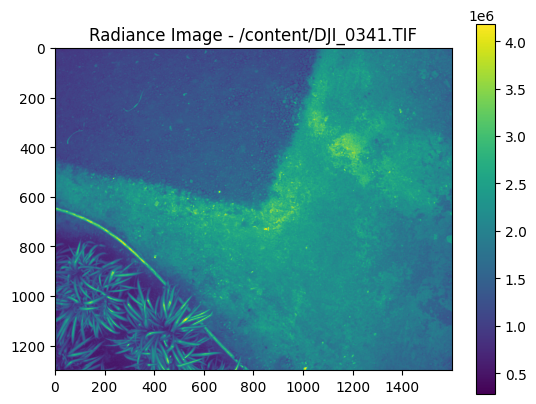

Radiance Values for /content/DJI_0342.TIF:
[[120320.88513 121344.88513 114688.88513 ... 201216.88513 201728.88513
  206848.88513]
 [116224.88513 125440.88513 120320.88513 ... 208896.88513 218624.88513
  207360.88513]
 [117248.88513 119808.88513 124928.88513 ... 213504.88513 213504.88513
  205824.88513]
 ...
 [263680.88513 336384.88513 373248.88513 ... 190464.88513 185344.88513
  188416.88513]
 [259072.88513 323072.88513 367104.88513 ... 179712.88513 181760.88513
  202752.88513]
 [237056.88513 293888.88513 362496.88513 ... 179200.88513 192000.88513
  189440.88513]]




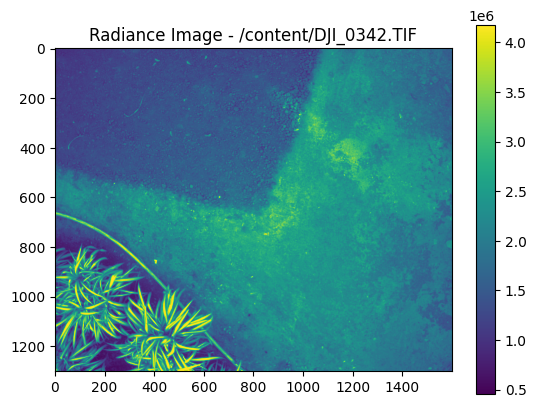

Radiance Values for /content/DJI_0343.TIF:
[[ 71136.748694  71424.748694  67392.748694 ... 113472.748694
  113760.748694 121536.748694]
 [ 73440.748694  62208.748694  60192.748694 ... 109152.748694
  118368.748694 118080.748694]
 [ 69120.748694  65376.748694  68832.748694 ... 105120.748694
  118944.748694 109440.748694]
 ...
 [ 46368.748694  48672.748694  41760.748694 ... 100800.748694
   96768.748694 103104.748694]
 [ 46368.748694  41472.748694  41760.748694 ... 105408.748694
  105696.748694 107712.748694]
 [ 40032.748694  45216.748694  41184.748694 ... 104832.748694
  102816.748694 107712.748694]]




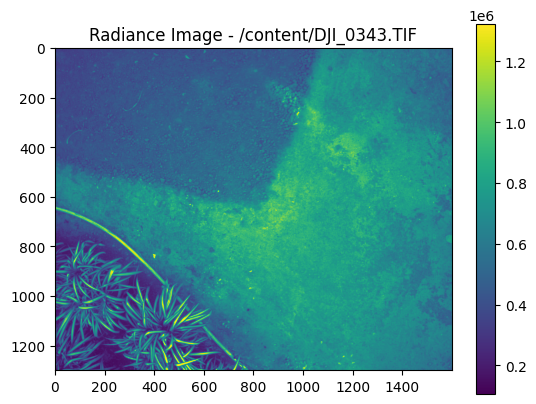

Radiance Values for /content/DJI_0344.TIF:
[[ 65664.827855  70272.827855  77472.827855 ...  91872.827855
   97344.827855  91872.827855]
 [ 80064.827855  80064.827855  77760.827855 ... 102240.827855
   95040.827855  96192.827855]
 [ 76320.827855  88992.827855  83520.827855 ...  97344.827855
   92736.827855  95328.827855]
 ...
 [194688.827855 213984.827855 218880.827855 ...  99360.827855
   98784.827855  94464.827855]
 [204480.827855 222336.827855 225216.827855 ... 106560.827855
  104544.827855 107136.827855]
 [190368.827855 220032.827855 214560.827855 ... 111744.827855
  106272.827855 107712.827855]]




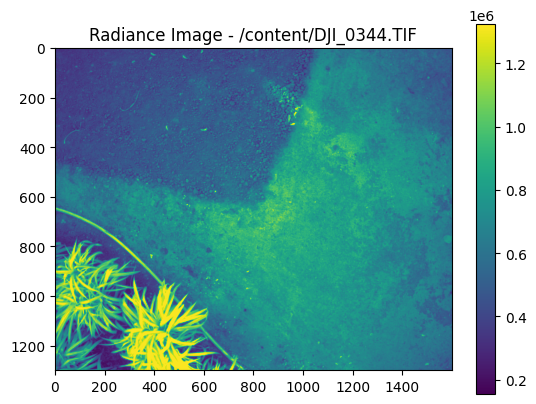

Radiance Values for /content/DJI_0345.TIF:
[[ 88320.833119  86400.833119  87040.833119 ... 167680.833119
  156800.833119 158400.833119]
 [ 84480.833119  91520.833119  87040.833119 ... 178880.833119
  171840.833119 168960.833119]
 [ 86720.833119  92480.833119  87680.833119 ... 170560.833119
  171200.833119 176000.833119]
 ...
 [263680.833119 273280.833119 275520.833119 ... 117760.833119
  120320.833119 123520.833119]
 [274880.833119 263680.833119 268480.833119 ... 123520.833119
  130880.833119 124480.833119]
 [266880.833119 267520.833119 260160.833119 ... 138240.833119
  124480.833119 119360.833119]]




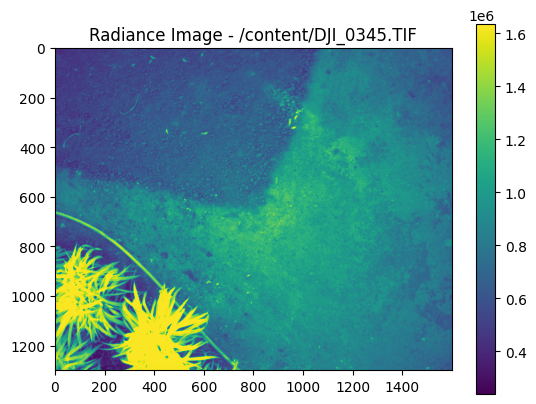

In [ ]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
# Step 1: Read the digital number (DN) values from the images
#image_paths = ["/content/DJI_0231.TIF","/content/DJI_0232.TIF","/content/DJI_0233.TIF","/content/DJI_0234.TIF","/content/DJI_0235.TIF"]
gain_values = [8.000, 8.000, 4.500, 4.50, 5.00]  # Replace with the appropriate gain values for each image
offset_values = [1.309057, 0.885130, 0.748694, 0.827855, 0.833119]  # Replace with the appropriate offset values for each image
radiance_values_list = []
for i, image_path in enumerate(image_paths):
    with rasterio.open(image_path) as dataset:
        dn = dataset.read(1)  # Assuming DN values are in the first band
        # Step 2: Set the calibration parameters for the current image
        gain = gain_values[i]
        offset = offset_values[i]
        # Step 3: Compute the radiance values
        radiance = (dn * gain) + offset
        # Step 4: Access and examine the radiance values
        print(f"Radiance Values for {image_path}:")
        print(radiance)
        print("\n")
        # Store the radiance values in the list
        radiance_values_list.append(radiance)
        # Apply gain and offset correction to obtain the corrected radiance values
        corrected_radiance = gain * radiance + offset
        # Convert corrected radiance values to radiance image (assuming single band)
        radiance_image = np.reshape(corrected_radiance, dataset.shape)
        # Display the radiance image
        plt.imshow(radiance_image, cmap='viridis')
        plt.title(f'Radiance Image - {image_path}')
        plt.colorbar()
        plt.show()

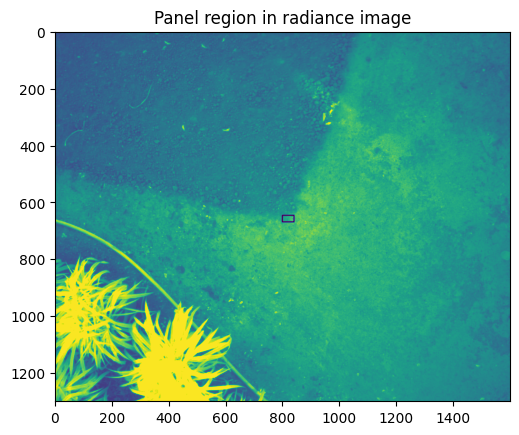

Mean Radiance in panel region: 1040719.315 W/m^2/nm/sr
Radiance to reflectance conversion factor: 0.000


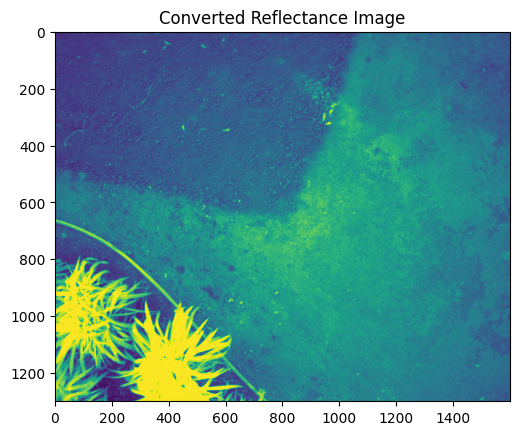

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

markedImg = radiance_image.copy()
ulx = 799 # upper left column (x coordinate) of panel area
uly = 647 # upper left row (y coordinate) of panel area
lrx = 840 # lower right column (x coordinate) of panel area
lry = 670 # lower right row (y coordinate) of panel area
cv2.rectangle(markedImg,(ulx,uly),(lrx,lry),(0,255,0),3)

# Our panel calibration by band (this is from MicaSense for their specific panel)
panelCalibration = {
    "Blue": 0.67,
    "Green": 0.69,
    "Red": 0.68,
    "Red edge": 0.67,
    "NIR": 0.61
}

# Select panel region from radiance image
panelRegion = radiance_image[uly:lry, ulx:lrx]
plt.imshow(markedImg, cmap='viridis')
plt.title('Panel region in radiance image')
plt.show()

meanRadiance = panelRegion.mean()
print('Mean Radiance in panel region: {:1.3f} W/m^2/nm/sr'.format(meanRadiance))
bandName = "Red edge"  # Replace with the actual band name
panelReflectance = panelCalibration[bandName]
radianceToReflectance = panelReflectance / meanRadiance
print('Radiance to reflectance conversion factor: {:1.3f}'.format(radianceToReflectance))

reflectanceImage = radiance_image * radianceToReflectance
plt.imshow(reflectanceImage, cmap='viridis')
plt.title('Converted Reflectance Image')
plt.show()


Mean Radiance in panel region: 2515472.668 W/m^2/nm/sr
Radiance to reflectance conversion factor: 0.000


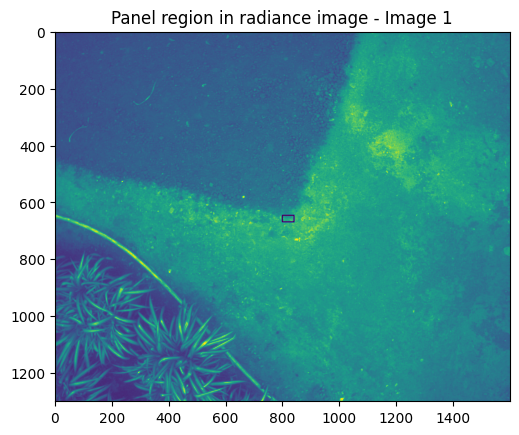

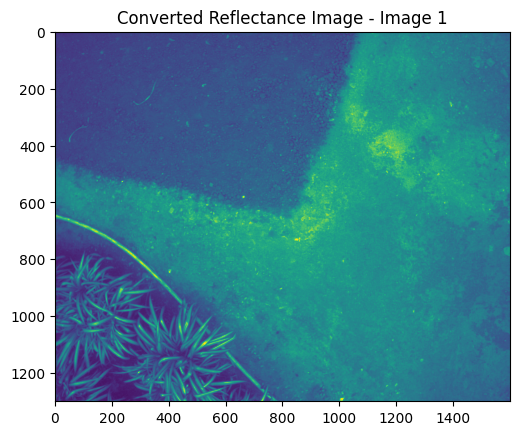

Mean Radiance in panel region: 2320481.010 W/m^2/nm/sr
Radiance to reflectance conversion factor: 0.000


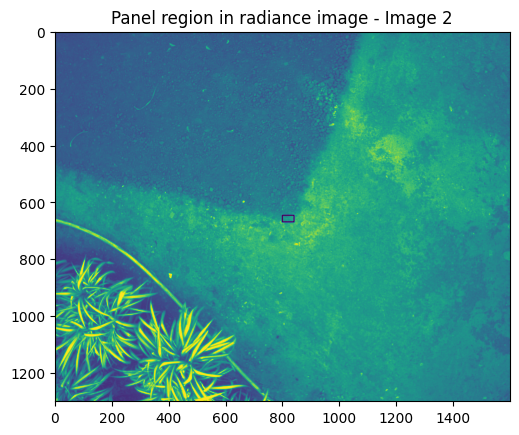

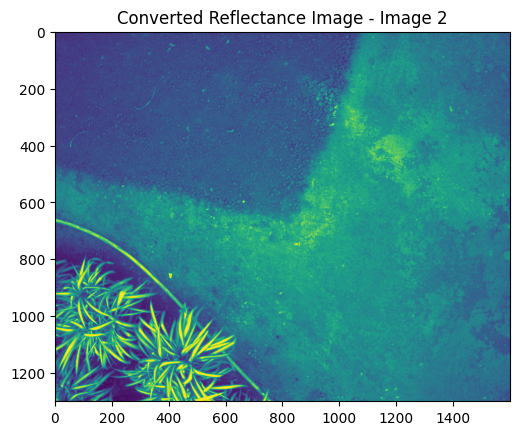

Mean Radiance in panel region: 862200.071 W/m^2/nm/sr
Radiance to reflectance conversion factor: 0.000


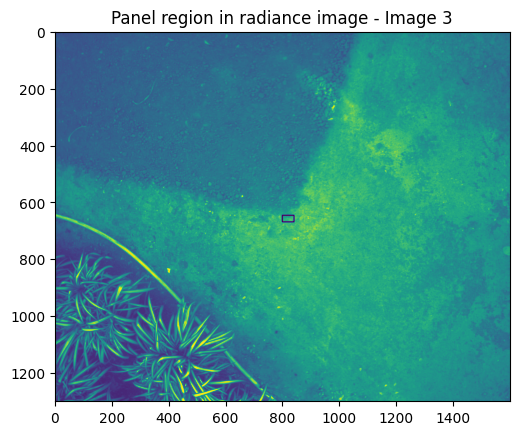

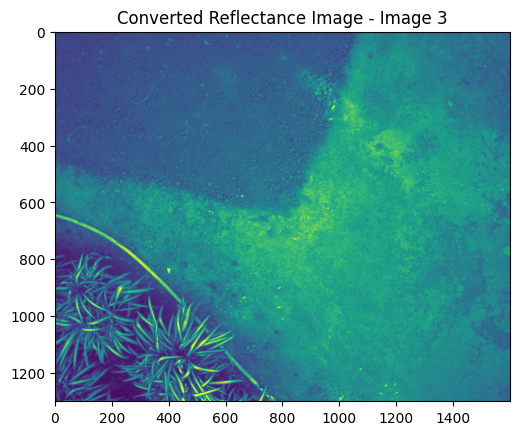

Mean Radiance in panel region: 876687.395 W/m^2/nm/sr
Radiance to reflectance conversion factor: 0.000


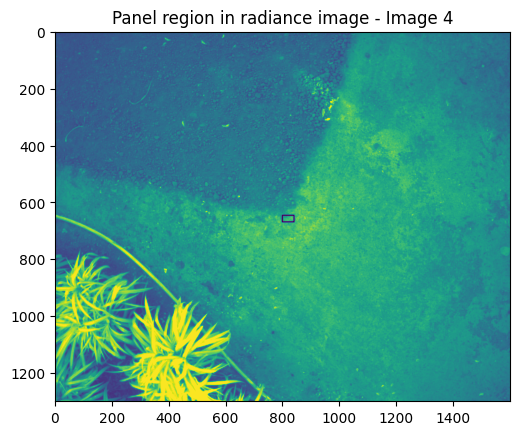

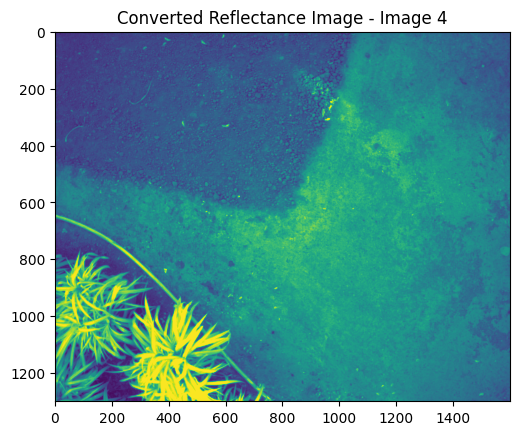

Mean Radiance in panel region: 1040719.315 W/m^2/nm/sr
Radiance to reflectance conversion factor: 0.000


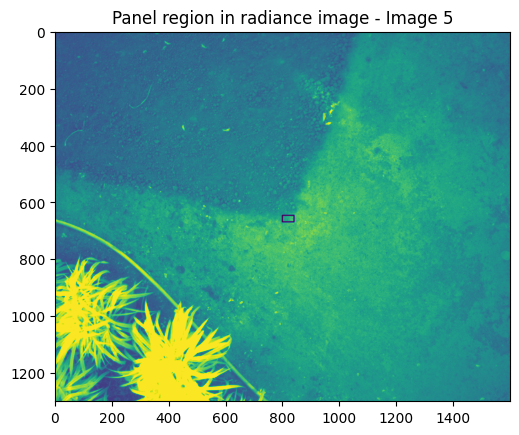

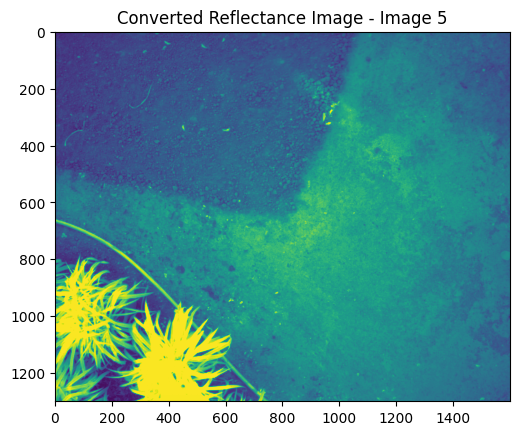

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import rasterio

def convert_to_reflectance(image_path, gain, offset, band_name, panel_calibration, ulx, uly, lrx, lry, save_path):
    # Read the digital number (DN) values from the image
    with rasterio.open(image_path) as dataset:
        dn = dataset.read(1)  # Assuming DN values are in the first band

    # Compute the radiance values
    radiance = (dn * gain) + offset

    # Apply gain and offset correction to obtain the corrected radiance values
    corrected_radiance = gain * radiance + offset

    # Convert corrected radiance values to radiance image (assuming single band)
    radiance_image = np.reshape(corrected_radiance, dataset.shape)

    # Mark the panel region
    marked_img = radiance_image.copy()
    cv2.rectangle(marked_img, (ulx, uly), (lrx, lry), (0, 255, 0), 3)

    # Select panel region from radiance image
    panel_region = radiance_image[uly:lry, ulx:lrx]

    # Calculate mean radiance in the panel region
    mean_radiance = panel_region.mean()
    print('Mean Radiance in panel region: {:1.3f} W/m^2/nm/sr'.format(mean_radiance))

    # Get the panel reflectance value from the calibration dictionary
    panel_reflectance = panel_calibration[band_name]

    # Compute the radiance to reflectance conversion factor
    radiance_to_reflectance = panel_reflectance / mean_radiance
    print('Radiance to reflectance conversion factor: {:1.3f}'.format(radiance_to_reflectance))

    # Convert radiance values to reflectance
    reflectance_image = radiance_image * radiance_to_reflectance

    # Save the reflectance image
    save_reflectance_image(reflectance_image, dataset.transform, dataset.crs, save_path)

    return reflectance_image, marked_img

def save_reflectance_image(data, transform, crs, save_path):
    with rasterio.open(
        save_path,
        'w',
        driver='GTiff',
        height=data.shape[0],
        width=data.shape[1],
        count=1,  # assuming single band
        dtype=data.dtype,
        crs=crs,
        transform=transform,
    ) as dst:
        dst.write(data, 1)

# Panel calibration by band (this is from MicaSense for their specific panel)
panel_calibration = {
    "Blue": 0.67,
    "Green": 0.69,
    "Red": 0.68,
    "Red edge": 0.67,
    "NIR": 0.61
}

# Image paths
image_paths = tif_file2

# Panel region coordinates
ulx, uly, lrx, lry = 799, 647, 840, 670

# Calibration parameters and band names for each image
calibration_params = [
    {"gain": 8.000, "offset": 1.309057, "band_name": "Blue"},
    {"gain": 8.000, "offset": 0.885130, "band_name": "Green"},
    {"gain": 4.500, "offset": 0.748694, "band_name": "Red"},
    {"gain": 4.50, "offset": 0.827855, "band_name": "Red edge"},
    {"gain": 5.00, "offset": 0.833119, "band_name": "NIR"}
]

# Save paths for reflectance images
save_paths = ["/content/reflectance_image_1.tif", "/content/reflectance_image_2.tif","/content/reflectance_image_3.tif","/content/reflectance_image_4.tif","/content/reflectance_image_5.tif"]

# Process each image
for i, image_path in enumerate(image_paths):
    gain = calibration_params[i]["gain"]
    offset = calibration_params[i]["offset"]
    band_name = calibration_params[i]["band_name"]

    reflectance_image, marked_img = convert_to_reflectance(
        image_path, gain, offset, band_name, panel_calibration, ulx, uly, lrx, lry, save_paths[i]
    )

    # Display the marked region in the radiance image
    plt.imshow(marked_img, cmap='viridis')
    plt.title(f'Panel region in radiance image - Image {i + 1}')
    plt.show()

    # Display the converted reflectance image
    plt.imshow(reflectance_image, cmap='viridis')
    plt.title(f'Converted Reflectance Image - Image {i + 1}')
    plt.show()


In [ ]:
src = rasterio.open('/content/reflectance_image_1.tif')
src1= rasterio.open('/content/reflectance_image_2.tif')
src2= rasterio.open('/content/reflectance_image_3.tif')
src3= rasterio.open('/content/reflectance_image_4.tif')
src4= rasterio.open('/content/reflectance_image_5.tif')
band_list = ['Blue','Green','Red','RedEdge','NIR']
i=0  ## for indexing
blue_reflectance=np.array(src.read())
green_reflectance=np.array(src1.read())
red_reflectance=np.array(src2.read())
rededge_reflectance=np.array(src3.read())
NIR_reflectance=np.array(src4.read())


In [ ]:
print(NIR_reflectance.shape)

(1, 1300, 1600)


In [ ]:
import numpy as np

# Assuming rededge_reflectance and NIR_reflectance are already defined

# Initialize the x array with zeros
x = np.zeros((1300 * 1600, 2))

i = 0
for k in range(1, 1300):
    for l in range(1, 1600):
        x[i, 0] = rededge_reflectance[0, k, l]
        x[i, 1] = NIR_reflectance[0, k, l]
        i += 1

# Reset i and j (assuming you want to reset them for the subsequent code)
i = 0
j = 0



In [ ]:
import numpy as np

# Assuming Blue_reflectance is already defined for the first image

# Flatten the blue array
x = blue_reflectance.flatten()

# Find the minimum and maximum values of x
a1 = np.min(x)
a2 = np.max(x)

# Print the results
print("Flattened Array (x):")
print(x)
print("Minimum Value a1:", a1)
print("Maximum Value a2:", a2)


Flattened Array (x):
[0.22038027 0.21492539 0.20183368 ... 0.33929664 0.31420419 0.31638614]
Minimum Value a1: 0.07528047353456536
Maximum Value a2: 1.1127985325274272


In [ ]:
import numpy as np

# Assuming Green_reflectance is already defined for the first image

# Flatten the green array
y = green_reflectance.flatten()

# Find the minimum and maximum values of y
b1 = np.min(y)
b2 = np.max(y)

# Print the results
print("Flattened Array (y):")
print(y)
print("Minimum Value b1:", b1)
print("Maximum Value of b2:", b2)

Flattened Array (y):
[0.28622165 0.28865756 0.27282415 ... 0.4262864  0.45673526 0.45064549]
Minimum Value b1: 0.13397735011174478
Maximum Value of b2: 1.2423158322223338


In [ ]:
import numpy as np

# Assuming Red_reflectance is already defined for the first image

# Flatten the red array
z = red_reflectance.flatten()

# Find the minimum and maximum values of z
c1 = np.min(z)
c2 = np.max(z)

# Print the results
print("Flattened Array (z):")
print(z)
print("Minimum Value c1:", c1)
print("Maximum Value c2:", c2)


Flattened Array (z):
[0.2524692  0.25349133 0.23918152 ... 0.37205833 0.36490343 0.38227963]
Minimum Value c1: 0.08381785450162281
Maximum Value c2: 1.042575186648826


In [ ]:
import numpy as np

# Assuming RedEdge_reflectance is already defined for the first image

# Flatten the red edge array
w = rededge_reflectance.flatten()

# Find the minimum and maximum values of w
d1 = np.min(w)
d2 = np.max(w)

# Print the results
print("Flattened Array (w):")
print(w)
print("Minimum Value d1:", d1)
print("Maximum Value d2:", d2)

Flattened Array (w):
[0.22582737 0.24167466 0.26643605 ... 0.38430028 0.36548162 0.3704339 ]
Minimum Value d1: 0.11885815995148698
Maximum Value d2: 1.0112587171934062


In [ ]:
import numpy as np

# Assuming NIR_reflectance is already defined for the first image

# Flatten the NIR array
v = NIR_reflectance.flatten()

# Find the minimum and maximum values of x
e1 = np.min(v)
e2 = np.max(v)

# Print the results
print("Flattened Array (v):")
print(v)
print("Minimum Value e1:", e1)
print("Maximum Value e2:", e2)

Flattened Array (v):
[0.25883929 0.25321241 0.25508804 ... 0.4051381  0.36481215 0.34980714]
Minimum Value e1: 0.14067486510902594
Maximum Value e2: 0.957509902155706


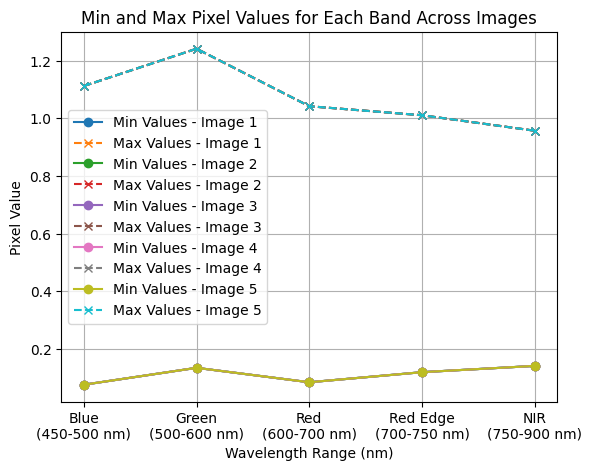

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming a1, a2, b1, b2, c1, c2, d1, d2, e1, e2 for each image
# Also, assuming wavelength ranges for each band
band_wavelength_ranges = {'Blue': (450, 500), 'Green': (500, 600), 'Red': (600, 700), 'Red Edge': (700, 750), 'NIR': (750, 900)}

# Band names
bands = ['Blue', 'Green', 'Red', 'Red Edge', 'NIR']

# Number of images
num_images = 5

# Create a list of indices for each band
band_indices = np.arange(len(bands))

# Plotting the min and max values for each band as separate lines
for i in range(num_images):
    min_values = [a1, b1, c1, d1, e1]  # Replace with actual values
    max_values = [a2, b2, c2, d2, e2]  # Replace with actual values

    plt.plot(band_indices, min_values, marker='o', linestyle='-', label=f'Min Values - Image {i + 1}')
    plt.plot(band_indices, max_values, marker='x', linestyle='--', label=f'Max Values - Image {i + 1}')

plt.xlabel('Wavelength Range (nm)')
plt.ylabel('Pixel Value')
plt.title('Min and Max Pixel Values for Each Band Across Images')
plt.xticks(band_indices, [f"{band}\n({band_wavelength_ranges[band][0]}-{band_wavelength_ranges[band][1]} nm)" for band in bands])
plt.legend()
plt.grid(True)  # Add grid lines for better readability
plt.show()


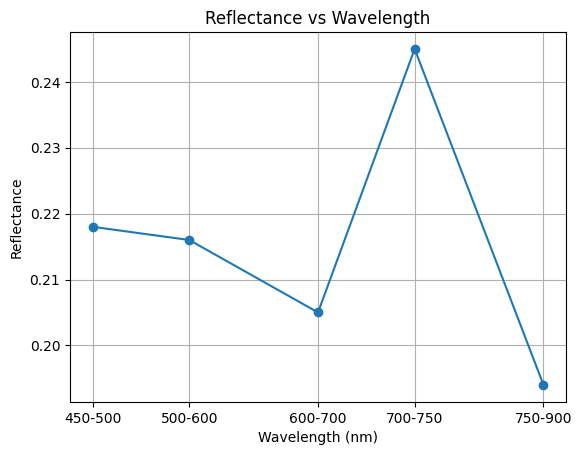

In [ ]:
import matplotlib.pyplot as plt

# Assuming wavelength and reflectance arrays are already defined
wavelength_ranges = ["450-500", "500-600", "600-700", "700-750", "750-900"]  # Replace with your actual wavelength range values
reflectance = [0.218, 0.216, 0.205, 0.245, 0.194]  # Replace with your actual reflectance values

# Extract the midpoints of each wavelength range
wavelength_midpoints = [(int(start) + int(end)) / 2 for start, end in [range.split('-') for range in wavelength_ranges]]

# Plotting the reflectance vs wavelength graph
plt.plot(wavelength_midpoints, reflectance, marker='o', linestyle='-')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Reflectance')
plt.title('Reflectance vs Wavelength')
plt.xticks(wavelength_midpoints, wavelength_ranges)  # Set x-axis ticks and labels
plt.grid(True)
plt.show()


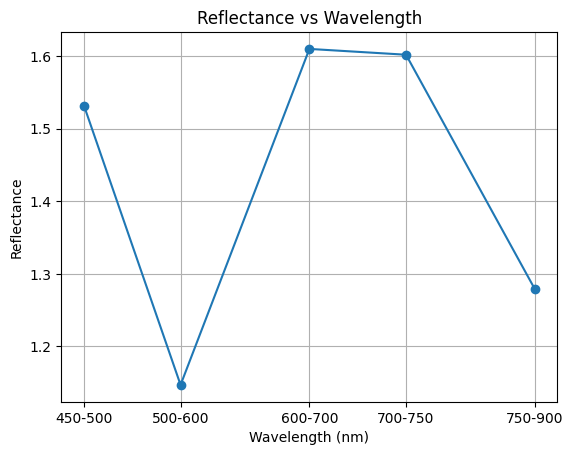

In [ ]:
import matplotlib.pyplot as plt

# Assuming wavelength and reflectance arrays are already defined
wavelength_ranges = ["450-500", "500-600", "600-700", "700-750", "750-900"]  # Replace with your actual wavelength range values
reflectance = [1.532, 1.147, 1.610, 1.602, 1.279]  # Replace with your actual reflectance values

# Extract the midpoints of each wavelength range
wavelength_midpoints = [(int(start) + int(end)) / 2 for start, end in [range.split('-') for range in wavelength_ranges]]

# Plotting the reflectance vs wavelength graph
plt.plot(wavelength_midpoints, reflectance, marker='o', linestyle='-')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Reflectance')
plt.title('Reflectance vs Wavelength')
plt.xticks(wavelength_midpoints, wavelength_ranges)  # Set x-axis ticks and labels
plt.grid(True)
plt.show()


Comparison for Heavy Metal


In [ ]:
# Pesticide Range

pmin1=0.14
pmin2=0.18
pmin3=0.1
pmin4=0.19
pmin5=0.19
pmax1=1.7
pmax2=1.59
pmax3=1.41
pmax4=1.4
pmax5=1.199

# Non-Pesticide Range

npmin1=0.1
npmin2=0.19
npmin3=0.1
npmin4=0.18
npmin5=0.18
npmax1=1.7
npmax2=1.59
npmax3=1.405
npmax4=1.399
npmax5=1.19

x1=abs(npmin1-pmin1)
x2=abs(npmax1-pmax1)
y1=abs(npmin2-pmin2)
y2=abs(npmax2-pmax2)
z1=abs(npmin3-pmin3)
z2=abs(npmax3-pmax3)
w1=abs(npmin4-pmin4)
w2=abs(npmax4-pmax4)
v1=abs(npmin5-pmin5)
v2=abs(npmax5-pmax5)

print(a1-pmin1,x1)
print(a2-pmax1,x2)
print(b1-pmin2,y1)
print(b2-pmax2,y2)
print(c1-pmin3,z1)
print(c2-pmax3,z2)
print(d1-pmin4,w1)
print(d2-pmax4,w2)
print(e1-pmin5,v1)
print(e2-pmax5,v2)

cond1=(a1-npmin1<=x1)
cond2=(a2-npmax1<=x2)
cond3=(b1-npmin2<=y1)
cond4=(b2-npmax2<=y2)
cond5=(c1-npmin3<=z1)
cond6=(c2-npmax3<=z2)
cond7=(d1-npmin4<=w1)
cond8=(d2-npmax4<=w2)
cond9=(e1-npmin5<=v1)
cond10=(e2-npmax5<=v2)

print(cond1)
print(cond2)
print(cond3)
print(cond4)
print(cond5)
print(cond6)
print(cond7)
print(cond8)
print(cond9)
print(cond10)


# Comparison
if ((cond1  or cond2) and (cond3 or cond4) and (cond5 or cond6) and (cond7 or cond8) and (cond9 or cond10)):
  print("Heavy Metal Trace Not Detected")
else:
  print("Heavy Metal Trace  Detected")



-0.06471952646543465 0.04000000000000001
-0.5872014674725727 0.0
-0.04602264988825522 0.010000000000000009
-0.3476841677776663 0.0
-0.016182145498377196 0.0
-0.36742481335117394 0.004999999999999893
-0.07114184004851302 0.010000000000000009
-0.3887412828065937 0.0009999999999998899
-0.049325134890974065 0.010000000000000009
-0.2414900978442941 0.009000000000000119
True
True
True
True
True
True
True
True
True
True
Heavy Metal Trace Not Detected
